In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwrods')

df = pd.read_csv('C:\\Users\\abcjv\\Downloads\\spotify_reviews.csv')
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abcjv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stopwrods: Package 'stopwrods' not found in
[nltk_data]     index


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494
...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973


In [4]:
def stars_to_sentiment(stars):
    if stars <= 2:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(stars_to_sentiment)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN,positive
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494,positive
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616,positive
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494,positive
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494,negative
...,...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105,neutral
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957,positive
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN,neutral
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973,positive


In [5]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

df['processed_context'] = df['content'].apply(preprocess_text)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment,processed_context
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN,positive,good
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494,positive,love app much using spotify 2 years different ...
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616,positive,perfect
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494,positive,best around music streaming app used family pl...
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494,negative,fr gatekeeping play button songs
...,...,...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105,neutral,decent music streaming app around right kinks ...
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957,positive,premium user years spotify fantastic service u...
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN,neutral,lot ads sudden even watch video want uninterru...
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973,positive,ui could better think search bar times liked s...


In [6]:
df_reviews = df[['processed_context', 'score', 'sentiment']]
df_reviews

,processed_context,score,sentiment
0,good,4,positive
1,love app much using spotify 2 years different ...,5,positive
2,perfect,5,positive
3,best around music streaming app used family pl...,5,positive
4,fr gatekeeping play button songs,1,negative
...,...,...,...
84160,decent music streaming app around right kinks ...,3,neutral
84161,premium user years spotify fantastic service u...,4,positive
84162,lot ads sudden even watch video want uninterru...,3,neutral
84163,ui could better think search bar times liked s...,4,positive


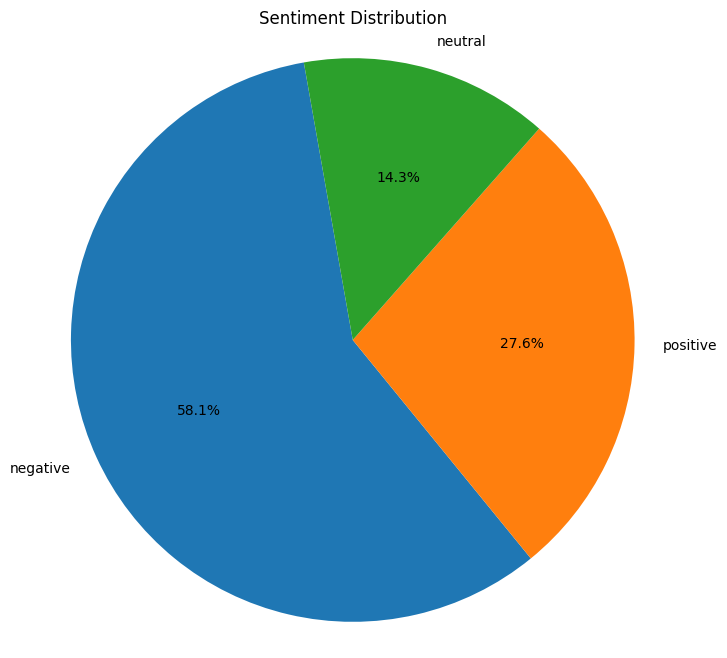

In [7]:
from matplotlib import pyplot as plt
import numpy as np

sentiment_count = df_reviews['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_count, labels=sentiment_count.index, autopct="%1.1f%%", startangle=100)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df_reviews['processed_context'], df_reviews['sentiment'], test_size=0.2)

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [9]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      9744
     neutral       0.00      0.00      0.00      2419
    positive       0.90      0.55      0.69      4670

    accuracy                           0.73     16833
   macro avg       0.53      0.51      0.50     16833
weighted avg       0.65      0.73      0.66     16833



c:\Users\abcjv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abcjv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abcjv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo